# <div align='center'>Introduction to Python for data analysis: Helpful tips and modules</div>


# Contents

1. <a href="#logging">Logging</a>
2. <a href='#pretty-printing'>Pretty-printing</a>
3. <a href='#os-sys'>The os and sys modules</a>
4. <a href='#typing'>The typing module</a>
5. <a href='#datetime'>The datetime module</a>
6. <a href='#defaultdict'>Defaultdict from the collections module</a>
7. <a href='#time'>The time module and how to know how much time a process takes</a>
8. <a href='#random'>The random module and how to generate random numbers</a>
9. <a href='#matplotlib'>The matplotlib module and how to make plots/figures/graphs</a>
10. <a href='#catch-errors'>How to catch errors?</a>
11. <a href='#open-file'>How to open a file?</a>
12. <a href='#write-file'>How to write a file?</a>
13. <a href='#assert'>The assert statement</a>
14. <a href='#performance'>Helpful modules to evaluate/improve performance</a>
    1. <a href='#cprofile'>Profiling and how to know where your code is slower with the cProfile module</a>
    2. <a href='#tracemalloc'>Track memory usage with the tracemalloc module</a>
    3. <a href='#parallel'>Parallel processing in Python with Pool.map()</a>
15. <a href='#exercises'>Exercises</a>

## <div id='logging'>1. Logging</div>

```logging``` is a must-use module to improve how you are printing messages. Typically, one needs to diferentiate different kind of messages, those for debugging, those that are meant to be as warnings, those that are errors, and those that are only meant to inform about something. We can do all that easily, while controlling the level of messages we want to show, with the ```logging``` module.

**Example:**

In [1]:
import logging

logging.basicConfig(level = 'INFO', format = '%(levelname)s: %(message)s')
log = logging.getLogger()

log.info('This is an example of a message meant to inform about something')


INFO: This is an example of a message meant to inform about something


**Most-used levels are:**

| Level | Numeric value   |
|---|---|
| CRITICAL | 50 |
| ERROR    | 40 |
| WARNING  | 30 |
| INFO     | 20 |
| DEBUG    | 10 |

Let's see with an example which messages are shown by each level:

In [2]:
levels = [logging.CRITICAL, logging.ERROR, logging.WARNING, logging.INFO, logging.DEBUG]

for level in levels:
    log.setLevel(level)
    log.critical(f'Messages for level = {level}:')
    log.error('This is an example of an info message')
    log.debug('This is an example of a debug message that is shown only if the level is DEBUG')
    log.warning('This is an example of an warning message')
    log.info('This is an example of an info message')

CRITICAL: Messages for level = 50:
CRITICAL: Messages for level = 40:
ERROR: This is an example of an info message
CRITICAL: Messages for level = 30:
ERROR: This is an example of an info message
CRITICAL: Messages for level = 20:
ERROR: This is an example of an info message
INFO: This is an example of an info message
CRITICAL: Messages for level = 10:
ERROR: This is an example of an info message
DEBUG: This is an example of a debug message that is shown only if the level is DEBUG
INFO: This is an example of an info message


As you can see, only messages with a value higher or equal to the level set are shown.

## <div id='pretty-printing'>2. Pretty-printing</div>


The ```pprint()``` function from the ```pprint``` module helps to print more nicely complex data structures, making the output better formatted and much more readable.

<u>Example with standard ```print()```:</u>

In [3]:
Names     = ['Matthias','John','Lukas','George','Jonathan','David']
Ages      = [23,45,33,54,32,38]
Countries = ['US','US','Germany','US','Argentina','Spain']

Users     = {ID : {'Name': name,'Age':Ages[ID],'Country':Countries[ID]} for ID,name in enumerate(Names)}
print(Users)

{0: {'Name': 'Matthias', 'Age': 23, 'Country': 'US'}, 1: {'Name': 'John', 'Age': 45, 'Country': 'US'}, 2: {'Name': 'Lukas', 'Age': 33, 'Country': 'Germany'}, 3: {'Name': 'George', 'Age': 54, 'Country': 'US'}, 4: {'Name': 'Jonathan', 'Age': 32, 'Country': 'Argentina'}, 5: {'Name': 'David', 'Age': 38, 'Country': 'Spain'}}


<u>Example with ```pprint()```:</u>

In [4]:
from pprint import pprint
pprint(Users,sort_dicts=False)

{0: {'Name': 'Matthias', 'Age': 23, 'Country': 'US'},
 1: {'Name': 'John', 'Age': 45, 'Country': 'US'},
 2: {'Name': 'Lukas', 'Age': 33, 'Country': 'Germany'},
 3: {'Name': 'George', 'Age': 54, 'Country': 'US'},
 4: {'Name': 'Jonathan', 'Age': 32, 'Country': 'Argentina'},
 5: {'Name': 'David', 'Age': 38, 'Country': 'Spain'}}


## <div id='os-sys'>3. The ```os``` and ```sys``` modules</div>

### Some helpful functions from the ```sys``` module

The ```sys``` module provides various functions and variables that are used to manipulate different parts of the Python runtime environment and is part of the Python's standard library.

First, let's import the ```sys``` module

```
import sys
```

<u>Some useful functions:</u>

* Use ```sys.exit([arg])``` to exit the program. The optional argument ```arg`` can be of any type, if it is an integer, zero is considered successful termination, any non-zero value is considered abnormal termination.

* Use ```sys.getsizeof(object)``` to get the size of ```object``` in bytes. The object can be of any type.

For more information about the above functions or other functions from the ```sys``` module, please look at https://docs.python.org/3/library/sys.html

### Some helpful functions from the ```os``` module

The ```os``` module in Python provides functions for interacting with the operating system and is part of the Python's standard library.

First, let's import the ```os``` module

```
import os
```

<u>Some useful functions:</u>

* Use ```os.listdir()``` to list directories/files on a directory.

* Use ```os.path.exists()``` to check if a given path/directory exists

* Use ```os.makedirs()``` to create directories. If one wants to create ```'path/folder'``` and path doesn't exists, ```makedirs()``` will create both (path and folder within)

* Use ```os.system``` to execute a command (a string) in a subshell

For more information about the above functions or other functions from the ```os``` module, please look at
https://docs.python.org/3/library/os.html

## <div id='typing'>4. The ```typing``` module</div>

### ```Optional``` and ```NoReturn``` for type hints

```Optional[str]``` signals that a variable can be ```None``` or of type ```str``` (```str``` can be replaced by any other type).

In [5]:
from typing import Optional, NoReturn

def print_message(var: Optional[str]) -> NoReturn:
    if var:
        print(var)
            
string_1 = None
print_message(string_1)

string_2 = ''
print_message(string_2)

string_3 = 'Example message'
print_message(string_3)

Example message


### Type aliases

It is possible to make a new type which is an alias of another type, this could be used to simplify the syntax and help the reader.

**Example:**

In [6]:
from typing import List

Vector = List[int]
def my_function(vec: Vector) -> int:
    return sum(vec)

# Return sum of [1,2,3,4]
print(my_function([1,2,3,4]))

10


**Note:** I used ```List``` instead of ```list```, this works similarly for other types (```dict->Dict```, etc)

**Note 2:** Since Python 3.9+, you can avoid the import and just use ```list[int]``` (similarly for other types)

### ```Union``` for type hints

```Union[type_1,type_2]``` can be used to signal that a variable can be of type ```type_1``` or of the type ```type_2```.

**Note:** Since Python 3.10, one can achieve the same with ```type_1 | type_2```

In [7]:
from typing import Union

Vector = List[Union[int,float]]
def sum_numbers(vec: Vector) -> Union[int,float]:
    return sum(vec)

print(sum_numbers([1.3,2.7]))
print(sum_numbers([1,2]))

4.0
3


### ```NewType``` for type hints

```NewType``` can be used to create a new type.

**Example:**

In [8]:
from typing import NewType

UserID = NewType('UserID',int)

# Create 10 users
Users = [UserID(n) for n in range(10)]

# print all user ids
for id in Users:
    print(f'UserID = {id}')

UserID = 0
UserID = 1
UserID = 2
UserID = 3
UserID = 4
UserID = 5
UserID = 6
UserID = 7
UserID = 8
UserID = 9


## <div id='datetime'>5. Get current date and time with the ```datetime``` module</div>

In [9]:
from datetime import datetime
now = datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2022-01-23 10:21:08


Let's print the date on different formats

In [10]:
# dd/mm/YY
dd_mm_yy = now.strftime("%d/%m/%Y")
print(f'Today: {dd_mm_yy}')

# Textual month day,year
m_d_y = now.strftime("%B %d, %Y")
print(f'Today: {m_d_y}')

# mm/dd/yy
mm_dd_yy = now.strftime("%m/%d/%y")
print(f'Today: {mm_dd_yy}')

# Month abbreviation-day-year
a_m_d_y = now.strftime("%b-%d-%Y")
print(f'Today: {a_m_d_y}')

Today: 23/01/2022
Today: January 23, 2022
Today: 01/23/22
Today: Jan-23-2022


**Note:** Alternatively, if you only need the date, you could replace ```now``` by ```today``` and put the following two lines before using ```today```:

```
from datetime import date
today = date.today()
```

Let's print only the time now:

In [11]:
current_time = now.strftime("%H:%M:%S")
print(f'{current_time = }')

current_time = '10:21:08'


## <div id='defaultdict'>6. Defaultdict from the collections module</div>

Defaultdict is a container present in the module ```collections```.

Defaultdict is a sub-class of the dictionary class that returns a dictionary-like object.

The functionality of both dictionaries and defualtdict are almost exactly the same except for the fact that ```defualtdict``` never raises a ```KeyError```. It provides a default value for keys that doesn't exist.

<u>Syntax:</u>
```
defaultdict(default_factory)
```

where ```default_factory``` is a function returning the default value for non-existing keys. If this argument is absent, the dictionray raises a KeyError.

**Example:**

In [12]:
from collections import defaultdict
 
def default_value():
    return "Not available"
     
my_defaultdict = defaultdict(default_value)
my_defaultdict["a"] = 1
my_defaultdict["b"] = 2
 
print(f'{my_defaultdict["a"] = }')
print(f'{my_defaultdict["b"] = }')
print(f'{my_defaultdict["c"] = }')

my_defaultdict["a"] = 1
my_defaultdict["b"] = 2
my_defaultdict["c"] = 'Not available'


## <div id='time'>7. How to know how much time is spent on something?</div>

Let's say I want to know how much is spent on looping over 10000 numbers:

In [13]:
import time

start = time.perf_counter()
for i in range(10000):
    pass
end = time.perf_counter()
print('Time spent looping over 10000 numbers = {} seconds'.format(end-start))

Time spent looping over 10000 numbers = 0.00031242892146110535 seconds


Let's use this now to show that using list comprehension is faster than doing a 'traditional' loop.

In [14]:
def f(x: int) -> int:
    return x*x

# make a loop and append value to list
start_1 = time.perf_counter()
list_1 = []
for i in range(100):
    list_1.append(f(i))
end_1 = time.perf_counter()

# use now comprehension
start_2 = time.perf_counter()
list_2 = [f(i) for i in range(100)]
end_2 = time.perf_counter()

print('Time w/o comprehension = {}'.format(end_1-start_1))
print('Time w/ comprehension = {}'.format(end_2-start_2))

Time w/o comprehension = 9.422469884157181e-05
Time w/ comprehension = 7.019797340035439e-05


Let's now show that using ```enumerate(list_2)``` is faster than doing ```range(len(list_2))```

In [15]:
# using range(len())
start_1 = time.perf_counter()
for i in range(len(list_2)):
    pass
end_1 = time.perf_counter()

# using enumerate()
start_2 = time.perf_counter()
for i in enumerate(list_2):
    pass
end_2 = time.perf_counter()

print(f'Time with range(len()) = {end_1-start_1}')
print(f'Time with enumerate() = {end_2-start_2}')

Time with range(len()) = 5.99161721765995e-05
Time with enumerate() = 4.179496318101883e-05


Finally, let's show the fastest way to create a list containing ```n``` equal lists

In [16]:
base_list = [1, 2, 3, 4]
n = 100

# slower
start_1 = time.perf_counter()
list_1 = [base_list for i in range(n)]
end_1 = time.perf_counter()

# faster
start_2 = time.perf_counter()
list_2 = [base_list] * n
end_2 = time.perf_counter()

print(f'Time for creating list_1 = {end_1-start_1}')
print(f'Time for creating list_2 = {end_2-start_2}')

Time for creating list_1 = 6.673019379377365e-05
Time for creating list_2 = 3.795092925429344e-05


## <div id='random'>8. How to generate random numbers?</div>

As an example, let's generate a (pseudo-)randomly-generated integer number in the [0,1000] range:

In [17]:
from random import randrange

random_number = randrange(1000)
print(f'{random_number = }')

new_random_number = randrange(1000)
print(f'{new_random_number = }')

random_number = 455
new_random_number = 436


Let's generate now float numbers between 0 and 1:

In [18]:
from random import random
random_float_number = random()
new_random_float_number = random()
print(f'{random_float_number = }')
print(f'{new_random_float_number = }')

random_float_number = 0.3599669598066524
new_random_float_number = 0.4926879605462071


## <div id='matplotlib'>9. How to make plots/figures/graphs with matplotlib?</div>

### How to make histograms?

Let's generate numbers in the [0,10] range and make a histogram, if the number of generated numbers is sufficiently high, the distribution should be flat.

DEBUG: matplotlib data path: /home/jbossios/.local/lib/python3.8/site-packages/matplotlib/mpl-data
DEBUG: CONFIGDIR=/home/jbossios/.config/matplotlib
DEBUG: matplotlib version 3.4.2
DEBUG: interactive is False
DEBUG: platform is linux
DEBUG: loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_warnings', '_io', 'marshal', 'posix', '_frozen_importlib_external', '_thread', '_weakref', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', '_abc', 'abc', 'io', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib.machinery', 'importlib.abc', '_operator', 'operator', 'keyword', '_heapq', 'heapq', 'itertools', 'reprlib', '_collections', 'collections', '_functools', 'functools', 'contextlib', 'importlib.util', 'google', 'goog

DEBUG: CACHEDIR=/home/jbossios/.cache/matplotlib
DEBUG: Using fontManager instance from /home/jbossios/.cache/matplotlib/fontlist-v330.json
DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG: findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG: findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG: findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
DEBUG: findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
DEBUG: findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG: findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 nor

DEBUG: findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG: findfont: score(<Font 'Chandas' (chandas1-2.ttf) normal normal 400 normal>) = 10.05
DEBUG: findfont: score(<Font 'Verdana' (Verdana.ttf) normal normal 400 normal>) = 3.6863636363636365
DEBUG: findfont: score(<Font 'Times New Roman' (Times_New_Roman_Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG: findfont: score(<Font 'Tlwg Mono' (TlwgMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG: findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 7.413636363636363
DEBUG: findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG: findfont: score(<Font 'Lohit Devanagari' (Lohit-Devanagari.ttf) normal normal 400 normal>) = 10.05
DEBUG: findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG: findfont: score(<Font 'Samyak Malayalam' (Samyak-

DEBUG: findfont: score(<Font 'Trebuchet MS' (Trebuchet_MS.ttf) normal normal 400 normal>) = 10.05
DEBUG: findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
DEBUG: findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
DEBUG: findfont: score(<Font 'FreeSans' (FreeSansBold.ttf) normal normal 600 normal>) = 10.24
DEBUG: findfont: score(<Font 'Courier New' (Courier_New_Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG: findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG: findfont: score(<Font 'Arial' (Arial_Bold_Italic.ttf) italic normal 700 normal>) = 7.698636363636363
DEBUG: findfont: score(<Font 'Ubuntu' (Ubuntu-LI.ttf) italic normal 300 normal>) = 11.145
DEBUG: findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-BoldItalic.otf) italic normal 700 normal>) = 11.335
DEBUG: findfont: score(<Font 'Lohit Telugu' (Lohit-Telugu.ttf) normal normal 400 normal>) =

DEBUG: findfont: score(<Font 'Nimbus Sans' (NimbusSans-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG: findfont: score(<Font 'KacstArt' (KacstArt.ttf) normal normal 500 normal>) = 10.145
DEBUG: findfont: score(<Font 'Samyak Tamil' (Samyak-Tamil.ttf) normal normal 500 normal>) = 10.145
DEBUG: findfont: score(<Font 'P052' (P052-Roman.otf) normal normal 400 normal>) = 10.05
DEBUG: findfont: score(<Font 'Pothana2000' (Pothana2000.ttf) normal normal 400 normal>) = 10.05
DEBUG: findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG: findfont: score(<Font 'Kalimati' (kalimati.ttf) normal normal 400 normal>) = 10.05
DEBUG: findfont: score(<Font 'Samyak Devanagari' (Samyak-Devanagari.ttf) normal normal 500 normal>) = 10.145
DEBUG: findfont: score(<Font 'Suruma' (Suruma.ttf) normal normal 500 normal>) = 10.145
DEBUG: findfont: score(<Font 'Arial' (arialbi.ttf) italic normal 700 normal>) = 7.698636363636363
DEBUG: findfont: score(<Font 

DEBUG: findfont: score(<Font 'Mukti Narrow' (MuktiNarrow.ttf) normal normal 400 normal>) = 10.05
DEBUG: findfont: score(<Font 'FreeSerif' (FreeSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG: findfont: score(<Font 'Tlwg Mono' (TlwgMono.ttf) normal normal 400 normal>) = 10.05
DEBUG: findfont: score(<Font 'Noto Serif CJK JP' (NotoSerifCJK-Regular.ttc) normal normal 400 normal>) = 10.05
DEBUG: findfont: score(<Font 'Impact' (Impact.ttf) normal normal 400 normal>) = 10.05
DEBUG: findfont: score(<Font 'RaghuMalayalamSans' (RaghuMalayalamSans-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG: findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Bold.otf) normal normal 700 condensed>) = 10.535
DEBUG: findfont: score(<Font 'Laksaman' (Laksaman-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG: findfont: score(<Font 'P052' (P052-BoldItalic.otf) italic normal 700 normal>) = 11.335
DEBUG: findfont: score(<Font 'Norasi' (Norasi-BoldOblique.ttf) oblique normal 700 normal>) = 11.3

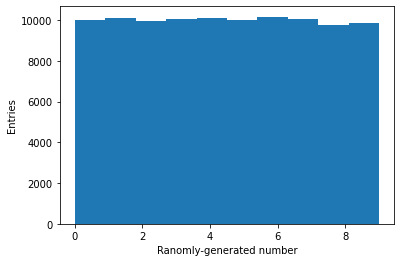

In [19]:
import matplotlib.pyplot as plt

# Geneate 100000 random numbers b/w 0 and 10
n_to_generate = 100000
numbers = [randrange(10) for i in range(n_to_generate)]

# Plot the distribution of the generated numbers
plt.hist(numbers)
plt.xlabel('Ranomly-generated number')
plt.ylabel('Entries')
plt.show()

**Note:** For more options (labels/legends, axis range, etc) please check the matplotlib.pyplot documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

### How to make graphs?

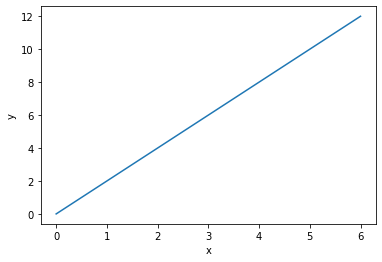

In [20]:
# Let's generate (x,y) points
x = [0, 1, 2, 3, 4, 5, 6]
y = [item * 2 for item in x]

# Let's plot y vs x
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Note: For more options (labels/legends, axis range, etc) please check the matplotlib.pyplot documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

## <div id='catch-errors'>10. How to catch errors?</div>

Unexpected behaviour will eventually happen and might cause errors.

In python, these situations are considered as exceptions, each raising different types of errors.

But, Python provides a way to handle/catch exceptions.

### Example 1

Let's say I created a dictionary and then I try to get the value for a given key, but the key doesn't exists (or I don't know if exists). In that case, I can 'try' to get the value and if it 'fails' I show the appropriate error/exception.

```
my_dict = {'a': 1, 'b': 2, 'c':4}

try:
    print(f'{my_dict["d"] = }')
except KeyError:
    raise KeyError("The key 'd' doesn't exists")
```

### Example 2

Let's say I want to take the square root of a value (which only works for positive values), I can use ```try``` and raise an error when it receives a negative value.

```
from math import sqrt

x = -1

try:
    sqrt(x)
except ValueError:
    raise ValueError("It's not possible to take the square root of a negative value")
```

## <div id='open-file'>11. How to open a file?</div>

Let's use the ```open()``` built-in function to open a text file:

In [21]:
# Open the file
input_file = open('example_text_file.txt', 'r')

# Print its content
print('Content of the "example_text_file.txt" file:')
for line in input_file: # loop over each file and print line's content
    print(line.replace('\n', '')) # remove newline from string

# Close the file!
input_file.close()

Content of the "example_text_file.txt" file:
This is an example text file containing two lines.
This is a second line of text.


**Note*** that I had to close the file with the ```close()``` function!

### How to open a file w/o having to remind myself to close it?

Use ```with open()```. Let's repeat the above example:

In [22]:
# Open the file
with open('example_text_file.txt', 'r') as input_file:

    # Print its content
    print('Content of the "example_text_file.txt" file:')
    for line in input_file: # loop over each file and print line's content
        print(line.replace('\n', '')) # remove newline from string

Content of the "example_text_file.txt" file:
This is an example text file containing two lines.
This is a second line of text.


**Note:** Now ```input_file``` is closed when I leave the ```with``` block and I don't have to explicitely close it. This happens regardless of how we exit (or why?) the block of code within the ```with``` statement. Any class containing ```__enter__``` and ```__exit__``` methods would work with ```with``` (```__enter__``` is executed at the beginning, while ```__exit__``` is executed when exiting in any way the block of code within the ```with``` statement).

## <div id='write-file'>12. How to write a file?</div>

Let's use the ```open()``` function again but this time to write a text file.

In [23]:
with open('output_file.txt', 'w') as output_file:
    output_file.write('My custom text file')
    
# Let's now read it
with open('output_file.txt', 'r') as input_file:
    for line in input_file:
        print(line)

My custom text file


## Open a file and raise an appropriate error if file doesn't exists

In [24]:
try:
    with open('fake_file.txt', 'r') as fake_file:
        for line in fake_file:
            print(line)
except OSError:
    print("The 'fake_file.txt' file doesn't exists (who could have guessed that?)")

The 'fake_file.txt' file doesn't exists (who could have guessed that?)


## <div id='assert'>13. How to check a condition and raise an error message if not satisfied?</div>

Use the ```assert``` statement, this is particularly helpful when debugging.

```assert``` takes an expression and an optional message.

<u>Syntax:</u>
```
assert CONDITION, MESSAGE
```

**Example:**
```
x = 10
assert x < 10, 'x is not smaller than 10'
```

## <div id='performance'>14. Helpful modules to evaluate/improve performance</div>

### <div id='cprofile'>14.A. Profiling and how to know where your code is slower with the ```cProfile``` module</div>

Python profilers helps you find which part of your code takes more time to run.

We will use the ```Profile()``` function from the ```cProfile``` module for extracting profiling data and use the ```pstats``` module to report it conveniently.

In [25]:
import cProfile
import pstats
from random import uniform
from cProfile import Profile
from __future__ import annotations # such that I can use tuple as type hint

def create_dict(keys: List[int], values: List[List[float]]) -> dict:
    """Create a dict for a list of keys associate each list from values to each key (coherently)"""
    return {key: value for key, value in zip(keys, values)}

def gen_from_uniform(n: int) -> float:
    """Generate a float number from an uniform(0, n) distribution and return rounded number to 2 decimals"""
    return round(uniform(0, n), 2)

def gen_data(n: int) -> tuple(List[int], List[float]):
    """Generate a list of keys and a list of a list of numbers"""
    # Create list of keys
    keys = [i for i in range(n)]
    # Create a list of floats for each key
    # Each list will contain n elements, where n is randomly generated in the [1, 100] range
    # Each item on each list is generated from an uniform[0, 10] distribution
    values = [[gen_from_uniform(100) for i in range(randrange(1, 100))] for i in range(n)]
    return keys, values

with Profile() as p:
    p.enable()
    keys, values = gen_data(20000)
    my_dict_all_values = create_dict(keys, values)
    my_dict_max_value = create_dict(keys, [max(item) for item in values])
    p.disable()
    stats = pstats.Stats(p).sort_stats('tottime')
    stats.print_stats() 

         4114967 function calls in 1.120 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1002293    0.460    0.000    0.460    0.000 {built-in method builtins.round}
  1002293    0.284    0.000    1.057    0.000 /tmp/ipykernel_1396274/1082864362.py:11(gen_from_uniform)
  1002293    0.254    0.000    0.312    0.000 /usr/lib/python3.8/random.py:415(uniform)
  1002293    0.058    0.000    0.058    0.000 {method 'random' of '_random.Random' objects}
        1    0.017    0.017    1.275    1.275 /tmp/ipykernel_1396274/1082864362.py:22(<listcomp>)
    20000    0.014    0.000    0.014    0.000 {built-in method builtins.max}
    20000    0.011    0.000    0.026    0.000 /usr/lib/python3.8/random.py:200(randrange)
    20000    0.010    0.000    0.014    0.000 /usr/lib/python3.8/random.py:250(_randbelow_with_getrandbits)
        2    0.004    0.002    0.004    0.002 /tmp/ipykernel_1396274/1082864362.py:9(<dictcomp>)
    25785    0.

Let's take a look at the above printout:

* ```ncalls```: as the name suggests, it's the number of times an operation is call. For example, the function ```gen_from_uniform()``` was called 994163 times.

* ```tottime```: is the total time spent on a function alone.

* ```cumtime```: is the total time spent on a function plus all other functions that were calle by given function.

* ```percall```: is the time (```tottime``` or ```cumtime```) spent by call.

* ```filename:lineno(function)```: as the name suggest, it shows the filename, line number and function name.

**Note:**

* ```ramdom.uniform(a, b)``` generates a float number between ```a``` and ```b``` if ```a < b``` and between ```b``` and ```a``` if ```a > b```.

* ```__future__``` is a built-in module that is used to import new features that are available in newer Python versions.

* You could also sort by cumulative time by passing ```'cumtime'``` to ```sort_stats()```.

### <div id='tracemalloc'>14.B. Track memory usage with the ```tracemalloc``` module</div>

Usually, it's not all about how fast a program can run, but also one has to be efficient in terms on memory management. You could have a lot of memory, you could even desperately do memory swapping but the total available memory will always be finite and you might ran out of it. 

In that case, you would have to understand why you are using so much memory. For that, you can use the ```tracemalloc``` module, which lets you trace allocated memory blocks. It provides the following information:

* Traceback where an object was allocated

* Statistics on allocated memory blocks per filename and per line number: total size, number and average size of allocated memory blocks

* Compute the differences between two snapshots to detect memory leaks

**Example 1:**

Let's create a big list, take a snapshot of memory allocation with ```tracemalloc.take_snapshot()``` and print the result for the top number 1. This will give you the line number and memory size. Let's use also ```traceback.format()``` to print the object that was created.

In [26]:
import tracemalloc
tracemalloc.start()

# Create a big list
big_list = [i for i in range(1000000)]

# Take snapshot
snapshot = tracemalloc.take_snapshot()

# Print top 1
stats = snapshot.statistics("lineno")
for stat in stats[:1]:
    print(stat)
    print(stat.traceback.format())

/tmp/ipykernel_1396274/2869854192.py:5: size=35.0 MiB, count=999744, average=37 B
['  File "/tmp/ipykernel_1396274/2869854192.py", line 5', '    big_list = [i for i in range(1000000)]']


As you can see, the output says I added an object (```big_list```) of size 35 MB on line 5.

**Example 2:**

Let's create another list, take another spanshot and compare snapshots.

In [27]:
import tracemalloc
tracemalloc.start()

# Create another list
another_list = [i*2 for i in range(1000)]

snapshot_2 = tracemalloc.take_snapshot()

# Show top 10
for diff in snapshot_2.compare_to(snapshot,"lineno")[:10]:
    print(diff)

/tmp/ipykernel_1396274/360274792.py:5: size=32.6 KiB (+32.6 KiB), count=872 (+872), average=38 B
/usr/lib/python3.8/tokenize.py:528: size=5264 B (+5264 B), count=94 (+94), average=56 B
/home/jbossios/.local/lib/python3.8/site-packages/IPython/core/compilerop.py:101: size=4771 B (+4771 B), count=87 (+87), average=55 B
/home/jbossios/.local/lib/python3.8/site-packages/jupyter_client/session.py:97: size=1990 B (+1990 B), count=12 (+12), average=166 B
/usr/lib/python3.8/codeop.py:143: size=2333 B (+1720 B), count=29 (+21), average=80 B
/usr/lib/python3.8/json/decoder.py:353: size=1553 B (+1553 B), count=18 (+18), average=86 B
/usr/lib/python3.8/tracemalloc.py:479: size=1048 B (+1048 B), count=12 (+12), average=87 B
/home/jbossios/.local/lib/python3.8/site-packages/traitlets/traitlets.py:621: size=1056 B (+909 B), count=15 (+13), average=70 B
/usr/lib/python3.8/tracemalloc.py:472: size=864 B (+864 B), count=12 (+12), average=72 B
/usr/lib/python3.8/tracemalloc.py:229: size=816 B (+816 B), c

Now, you can see at the top, that I created another object at line 5 of size 32.6 KB, representing an addition of 32.6 KB (shown as ```(+32.6 KiB)```).

### <div id='parallel'>14.C. Parallel processing in Python: the ```Pool``` class</div>

When things run in parallel, they are executed simultaneously in multiple processors and it is meant to reduce the overall processing time.

There are two types of execution: *synchronous* and *asynchronous*. In a synchronous execution, the processes are completed in the same order in which they were started. This is achieved by *locking* the main program until the respective processes are finished.

#### Parallelizing using ```Pool.map()```

The Pool class represents a pool of worker processes. It has methods which allows tasks to be offloaded to the worker processes in a few different ways. But here, we will start with the simplest example. Let's say we have a list of numbers and we want to apply a function to each item on the list. We could do a loop and apply the function to each item, one by one (i.e. sequentially, we could even use list comprehension), or we could use ```Pool.map()``` to execute, let's say, in bunches of 4 that will run in parallel. Let's see how that it would look like:

In [28]:
from multiprocessing import Pool

def my_function(x: int) -> int:
    return x*x + x - 1

start = time.perf_counter()
with Pool(4) as p:
    result = p.map(my_function, [i for i in range(200000)])
end = time.perf_counter()
print(f'Spent time = {end-start} s')

Spent time = 0.25286048790439963 s


This is faster than using list comprehension (but only because the list is huge, otherwise list comprehension would actually be faster):

In [29]:
start = time.perf_counter()
result = [x*x + x - 1 for x in [i for i in range(2000000)]]
end = time.perf_counter()
print(f'Spent time = {end-start} s')

Spent time = 1.7113417270593345 s


**Note:** There is a limit to how many processes you can run simultaneously, and that is the number of processors in your computer.

**How to know how many processors has your machine?**

```
import multiprocessing as mp
print(f'Number of processors = {mp.cpu_count()}')
```

#### What about if I want to use a function with two arguments but set the second one to always the same value?

Let's say now ```my_function()``` has two arguments, but I want one of them to be always the same.

In that case, we can use ```partial()``` from ```functools```:

In [30]:
from functools import partial

def my_function(x: int, a: int) -> int:
    return x*x + x - a

with Pool(4) as p:
    my_function_a = partial(my_function, a = 2)
    result = p.map(my_function_a, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

print(f'{result = }')

result = [0, 4, 10, 18, 28, 40, 54, 70, 88, 108, 130, 154, 180, 208, 238, 270]


**Note:** arguments that are different b/w each process should go first in ```my_function```! That means I can not switch the order of ```x``` and ```a``` in the definition of ```my_function```.

# <div id='exercises' align='center'>15. Exercises</div>

## Exercise 1

Print the difference between a randomly generated number (generated in the 0-100 range) and 13, if the number is larger than 10 return 1, return 0 otherwise

**Answer:**

In [31]:
def check_number(x: int) -> int:
    if x - 13 > 10:
        return 1
    else:
        return 0

from random import randrange

random_number = randrange(100)

print(f'The result of the check for {random_number} gives {check_number(random_number)}')

The result of the check for 52 gives 1


## Exercise 2

Evaluate and plot the function f(x: int) = x^2 for x values in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

**Answer:**

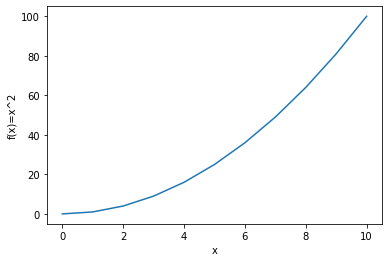

In [32]:
def f(x: int) -> int:
    """f(x) = x^2"""
    return x**2

# Generate x and y values
x = [i for i in range(11)]
y = [f(item) for item in x]

# Plot f(x) vs x
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)=x^2')
plt.show()

## Exercise 3

Generate 100000 numbers from a Gaussian distribution (instructions below) with mu=100 and sigma=10, plot numbers as a histogram and print how much time it took to do everything.

**How to generate numbers from a Gaussian distribution?**

```
from random import gauss
random_number = gauss(mu, sigma)
```

**Answer:**

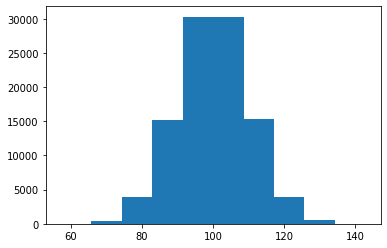

Time spent = 1.101108375005424 s


In [33]:
from random import gauss

start = time.perf_counter()

random_numbers = [gauss(100, 10) for i in range(100000)]

plt.hist(random_numbers)
plt.show()

end = time.perf_counter()
print(f'Time spent = {end-start} s')